# Notebook supporting feature engineering and eda of training set

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df: pd.DataFrame = pd.read_csv('../data/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Replace text content (string values) with numerical one

- TODO Basement - few features about the same topic, but all will have NA if no basement

In [3]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
for col in train_df.columns:
    if pd.api.types.is_string_dtype(train_df[col].dtype):
        train_df[col + '_fact'] = pd.factorize(train_df[col])[0]

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_fact,GarageFinish_fact,GarageQual_fact,GarageCond_fact,PavedDrive_fact,PoolQC_fact,Fence_fact,MiscFeature_fact,SaleType_fact,SaleCondition_fact
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,-1,-1,-1,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,-1,-1,-1,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,-1,-1,-1,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1,1,0,0,0,-1,-1,-1,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,-1,-1,-1,0,0


## Group years into bins

##### Rationale:
###### Years close to each other are not important differentiator. Bins can provide real impact.

#### When houses and garages were built?

<AxesSubplot:>

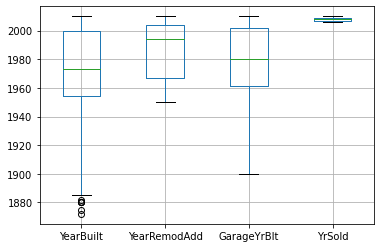

In [5]:
train_df.boxplot(column=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'])

##### Observations:
- There is no need to create bins from YrSold - values are too close to each other
- Most of the values are between 1960s and 2000s
- There are outliers, especially for YearBuilt

In [6]:
# Arbitrary bin values based on above plot. Could be calculated within deeper analysis

train_df['YearBuilt_bins'] = pd.qcut(train_df['YearBuilt'], q=10, labels=False, precision=0)
train_df['YearRemodAdd_bins'] = pd.qcut(train_df['YearRemodAdd'], q=8, labels=False, precision=0)
train_df['GarageYrBlt_bins'] = pd.qcut(train_df['GarageYrBlt'], q=8, labels=False, precision=0)

train_df[['YearBuilt', 'YearBuilt_bins', 'YearRemodAdd', 'YearRemodAdd_bins', 'GarageYrBlt', 'GarageYrBlt_bins']].head()

,YearBuilt,YearBuilt_bins,YearRemodAdd,YearRemodAdd_bins,GarageYrBlt,GarageYrBlt_bins
0,2003,7,2003,5,2003.0,6.0
1,1976,5,1976,2,1976.0,3.0
2,2001,7,2002,5,2001.0,5.0
3,1915,0,1970,2,1998.0,5.0
4,2000,7,2000,4,2000.0,5.0


#### Lot, garage and other areas

<AxesSubplot:>

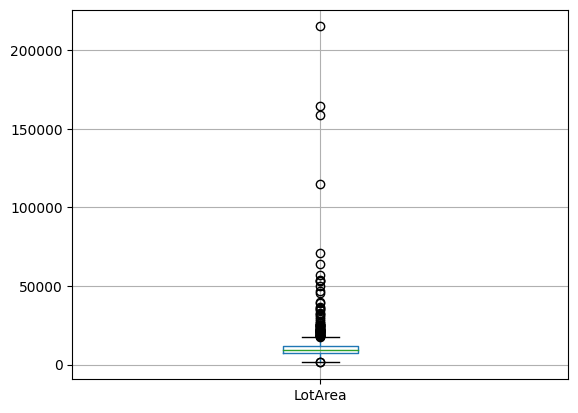

In [7]:
train_df.boxplot(column=['LotArea'])

<AxesSubplot:>

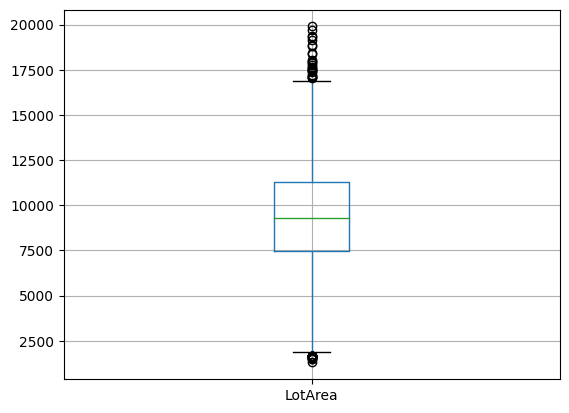

In [25]:
train_df[train_df['LotArea'] < 20000].boxplot(column=['LotArea'])

##### Observations:
- LotArea has a lot of outliers, especially within big areas
- There is clear set of values within similar range (below 12500)
-

In [35]:
train_df['LotArea_bins'] = pd.qcut(train_df['LotArea'], q=4, labels=False, precision=0)

train_df[['LotArea', 'LotArea_bins']].head()

,LotArea,LotArea_bins
0,8450,1
1,9600,2
2,11250,2
3,9550,2
4,14260,3


<AxesSubplot:>

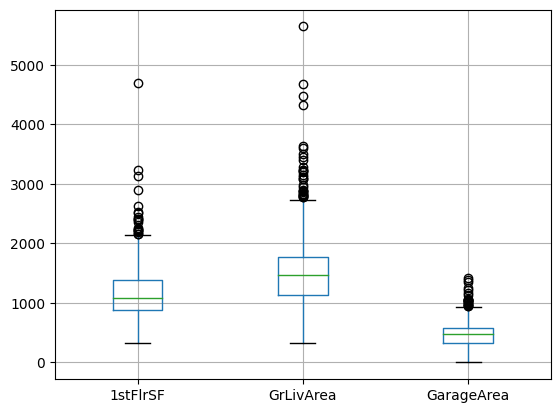

In [9]:
train_df.boxplot(column=['1stFlrSF', 'GrLivArea', 'GarageArea'])

##### Observations:
- Again a lot of outliers
- There is clear set of values within similar range

In [10]:
train_df['1stFlrSF_bins'] = pd.qcut(train_df['1stFlrSF'], q=6, labels=False, precision=0)
train_df['GrLivArea_bins'] = pd.qcut(train_df['GrLivArea'], q=6, labels=False, precision=0)
train_df['GarageArea_bins'] = pd.qcut(train_df['GarageArea'], q=4, labels=False, precision=0)

train_df[['1stFlrSF', '1stFlrSF_bins', 'GrLivArea', 'GrLivArea_bins', 'GarageArea', 'GarageArea_bins']].head()

,1stFlrSF,1stFlrSF_bins,GrLivArea,GrLivArea_bins,GarageArea,GarageArea_bins
0,856,1,1710,4,548,2
1,1262,3,1262,2,460,1
2,920,1,1786,4,608,3
3,961,2,1717,4,642,3
4,1145,3,2198,5,836,3


<AxesSubplot:>

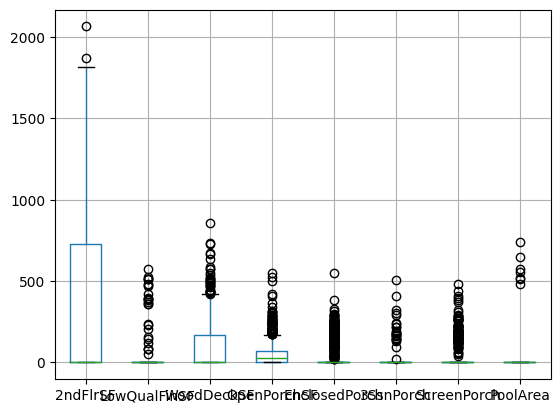

In [37]:
often_empty_columns = ['2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

train_df.boxplot(column=often_empty_columns)

For column: 2ndFlrSF, intervals: [-1, 1, 109, 625, 776, 926, inf]
For column: LowQualFinSF, intervals: [-1, 1, 52, 168, 377, 477, inf]
For column: WoodDeckSF, intervals: [-1, 1, 11, 120, 171, 240, inf]
For column: OpenPorchSF, intervals: [-1, 1, 3, 39, 63, 112, inf]
For column: EnclosedPorch, intervals: [-1, 1, 18, 104, 144, 205, inf]
For column: 3SsnPorch, intervals: [-1, 1, 22, 150, 180, 239, inf]
For column: ScreenPorch, intervals: [-1, 1, 39, 143, 180, 224, inf]
For column: PoolArea, intervals: [-1, 1, 479, 515, 555, 612, inf]


<AxesSubplot:>

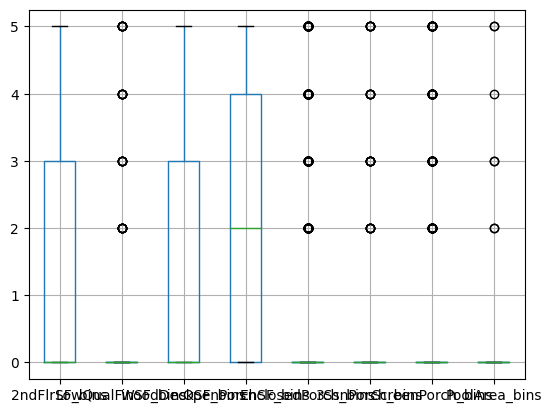

In [104]:
for col in often_empty_columns:
    counts = pd.qcut(train_df.loc[train_df[col] > 0][col], q=4).value_counts()

    bins_intervals = [-1, 1, np.inf]
    for interval in counts.index:
        bins_intervals.append((int(interval.left)))

    intervals_sorted = sorted(bins_intervals)
    print(f'For column: {col}, intervals: {intervals_sorted}')

    train_df[col + '_bins'] = pd.cut(train_df[col], bins=intervals_sorted, labels=list(range(6))).cat.codes

train_df.boxplot([c + '_bins' for c in often_empty_columns])

##### Observations
- A lot of zeroes, so cut should be used instead of qcut; qcut is to calculate intervals
- For few features columns are mostly 0 - should be checked if columns can be dropped
- Experiment could be done to replace some categories with boolean output (zero & non-zero)

## Description of already numeric features

- TODO Quite a lot of outliers, especially on max side
- TODO Values on different scales
- TODO MoSold should be probably removed

In [14]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MiscFeature_fact,SaleType_fact,SaleCondition_fact,YearBuilt_bins,YearRemodAdd_bins,GarageYrBlt_bins,LotArea_bins,1stFlrSF_bins,GrLivArea_bins,GarageArea_bins
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,-0.956849,0.234932,0.35000,4.421918,3.376712,3.445975,4.499315,2.497260,2.497945,1.475342
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,0.245984,0.804553,0.88787,2.817757,2.221585,2.283074,2.874219,1.711748,1.709746,1.110148
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,-1.000000,0.000000,0.00000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.750000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,-1.000000,0.000000,0.00000,4.000000,3.000000,3.000000,4.500000,2.500000,2.000000,1.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,-1.000000,0.000000,0.00000,7.000000,5.000000,5.000000,7.000000,4.000000,4.000000,2.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,3.000000,8.000000,5.00000,9.000000,7.000000,7.000000,9.000000,5.000000,5.000000,3.000000


## Correlation between features

- There are already high correlation between some features

In [15]:
corr: pd.DataFrame = train_df.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MiscFeature_fact,SaleType_fact,SaleCondition_fact,YearBuilt_bins,YearRemodAdd_bins,GarageYrBlt_bins,LotArea_bins,1stFlrSF_bins,GrLivArea_bins,GarageArea_bins
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.014074,-0.016932,-0.017712,-0.004446,-0.011059,-0.006427,-0.003726,-0.001777,-0.002416,0.006615
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.016437,0.012874,-0.015047,0.060702,0.007560,0.094606,-0.348606,-0.240644,0.073642,-0.068332
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.007872,0.006370,0.072517,0.123288,0.102659,0.066370,0.605638,0.366258,0.336587,0.307382
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.089707,-0.013882,0.000199,-0.002666,0.008646,-0.033376,0.480573,0.248409,0.233083,0.164528
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,-0.083121,0.063406,0.131870,0.638594,0.552653,0.604153,0.257881,0.422385,0.584594,0.540647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GarageYrBlt_bins,-0.006427,0.094606,0.066370,-0.033376,0.604153,-0.323564,0.807231,0.684184,0.250520,0.122224,...,-0.077529,0.127557,0.217294,0.872909,0.710817,1.000000,0.035062,0.222288,0.269454,0.575922
LotArea_bins,-0.003726,-0.348606,0.605638,0.480573,0.257881,-0.035449,0.111190,0.086535,0.190261,0.207823,...,0.065479,0.012963,0.032727,0.102014,0.081726,0.035062,1.000000,0.417723,0.436553,0.347871
1stFlrSF_bins,-0.001777,-0.240644,0.366258,0.248409,0.422385,-0.154975,0.278067,0.223881,0.299147,0.357807,...,-0.026578,0.073875,0.142915,0.291834,0.235840,0.222288,0.417723,1.000000,0.470140,0.466326
GrLivArea_bins,-0.002416,0.073642,0.336587,0.233083,0.584594,-0.115737,0.239752,0.305932,0.331587,0.120088,...,-0.036457,0.032987,0.074747,0.293823,0.269431,0.269454,0.436553,0.470140,1.000000,0.460923


In [16]:
for col in train_df.columns:
    if col in corr:
        col_sorted = corr[col].sort_values(ascending=False)
        print(col_sorted[1])

0.06650900950191323
0.7708396619425061
0.605638357444538
0.48057327522528026
0.7909816005838053
0.22791158639694706
0.9662605641251347
0.9570671331398399
0.47749304709571444
0.6492117535742649
0.7351647961785289
0.4153596051815893
0.8195299750050339
0.9070546506867899
0.6875010641666033
0.2216633481235792
0.9007553122761162
0.6492117535742649
0.1190481678808047
0.6397543275457739
0.6097073002717436
0.676619935742649
0.2817210402648814
0.8254893743088425
0.7243931381986498
0.9567555465945994
0.882475414281462
0.8944470143352734
0.32441344456812926
0.33022396171200064
0.23451238644859992
0.07002922773085365
0.18453026951684842
0.9384016221034005
0.5478908301970202
0.07125488475868938
0.06808527703896494
0.7909816005838053
0.39926967855640855
0.19713093862382264
0.39926967855640855
0.3458066411093216
0.5072032466851077
0.10814052632343978
0.3080734084680183
0.5072032466851077
0.18419776547817274
0.18917211091677272
0.21312282128545232
0.7708396619425061
0.2216633481235792
0.50973251883017

# Nulls and uniqueness

- 17 columns with null values
- Features differ a lot in number of unique values
- TODO Strategy to fill missing values needed

In [17]:
train_df.isnull().sum()

Id                    0
MSSubClass            0
MSZoning              0
LotFrontage         259
LotArea               0
                   ... 
GarageYrBlt_bins     81
LotArea_bins          0
1stFlrSF_bins         0
GrLivArea_bins        0
GarageArea_bins       0
Length: 131, dtype: int64

In [18]:
train_df.nunique()

Id                  1460
MSSubClass            15
MSZoning               5
LotFrontage          110
LotArea             1073
                    ... 
GarageYrBlt_bins       8
LotArea_bins          10
1stFlrSF_bins          6
GrLivArea_bins         6
GarageArea_bins        4
Length: 131, dtype: int64